![data-x](https://raw.githubusercontent.com/afo/data-x-plaksha/master/imgsource/dx_logo.png)


# __Image Classification with Convolutional Neural Networks (CNN's)__

#### Author: Alexander Fred Ojala
#### Edits: Elias Castro Hernandez

**Sources:** 
* **Training + explanations**: https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.htmlory
* **Theory**: http://cs231n.github.io/

**Copright:** Feel free to do whatever you want with this code.
___
___

> <img src= "data/pupr.png" height="400" width="400"><img src= "data/pupg.png" height="400" width="400"><img src= "data/pupb.png" height="400" width="400">

---
___

# Build your own Cats vs Dogs binary classifier

In this notebook we will implement a CNN that is a binary Cats vs Dogs classifier. We will use [Transfer learning](http://cs231n.github.io/transfer-learning/) and remove the top layer of a pretrained network [(VGG16 on Imagenet)](https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/), extracting the features of the training and validation images and then just training the fully connected top layer of that network. This way we will be able to make accurate predictions even though we just have a small data set.

The data conists of 2000 training images (1000 cats and 1000 dogs), 800 validation images (400 cats and 400 dogs), and 100 test images (cats and dogs mixed). [Get the data here.](https://www.dropbox.com/s/a8zo6udq83xsx05/data-x_cnn_data.tar.gz?dl=1) 

The pretrained VGG16 weighs that you should load into your model (in order to extract the bottleneck features) can be [downloaded here](https://www.dropbox.com/s/fvx7hv5vr8j3sc6/vgg16_weights_features.tar.gz?dl=1). Extracted features are included so that you can run the code instantly.


The reason why we are using a pretrained network, extracting bottleneck features and training only the top layers is that this is a great way to obtain a high prediction accuracy without having a huge data set and without having to run the training for a long time. It would take up to several days to run this analysis and training your own CNN on a personal computer (in order to obtain the same level of accuracy).


### Table of Contents

> #### [Part 0: Brief Overview of Convolutional Neural Networs](#Part-0:-Convolutional-Neural-Networks)

> #### [Part 1: Install Keras Tensorflow + all dependencies](#Part-1:-Install-Keras-+-Tensorflow)

> #### [Part 2: Extract bottleneck features from the data set](#Part-2:-Extract-bottleneck-features-from-the-data-set)

> #### [Part 3: Train the top layer of your CNN](#Part-3:-Train-the-top-layer-of-your-CNN)

> #### [Part 4: Make predicitons on the mixed test images](#Part-4:-Validate-accuracy-and-make-predictions-on-unlabeled-data)

### Additional Material

> #### [Appendix I: Image Classification using Google ML API](#Appendix-I:-Image-Classification-using-Google-ML-API)

> #### [Appendix II: Resources and references to material we won't cover in detail](#Appendix-II:-Resources-and-references-to-material-we-won't-cover-in-detail) 

<br>
___
___

<div id='sec1'></div>
## Part 0: Theoretical Background

### __What is a Neural Network?__

In [1]:

from IPython.display import HTML

# Youtube
HTML('<div style="text-align: center"><iframe width="860" height="615" src="https://www.youtube.com/embed/aircAruvnKk?rel=0&amp;;start=0&end=720;showinfo=0" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe></div>')

___
### __Historical Overview of Convolutional Nerual Networks for Visual Recognition__

All the following images were sourced from Stanford's CS231 presentations. 

<table align="center"><img src= "data/Presentation/vision1.png" align="center" height="700" width="900"></table>
___

<table align="center"><img src= "data/Presentation/vision2.png" align="center" height="700" width="900"></table>
___

<table align="center"><img src= "data/Presentation/vision3.png" align="center" height="700" width="900"></table>
___

<table align="center"><img src= "data/Presentation/vision4.png" align="center"></table>
___

<table align="center"><img src= "data/Presentation/vision5.png" align="center" height="700" width="900"></table>
___

<table align="center"><img src= "data/Presentation/vision6.png" align="center" height="700" width="900"></table>
___

<table align="center"><img src= "data/Presentation/vision7.png" align="center" height="700" width="900"></table>
___

<table align="center"><img src= "data/Presentation/vision8.png" align="center" height="700" width="900"></table>

<table align="center"><img src= "data/Presentation/vision9.png" align="center" height="700" width="900"></table>
___

<table align="center"><img src= "data/Presentation/vision10.png" align="center" height="700" width="900"></table>
___

<table align="center"><img src= "data/Presentation/vision11.png" align="center" height="700" width="900"></table>
___

## __But what is a convolution?__

<img src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/arbitrary_padding_no_strides.gif"><img src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/full_padding_no_strides.gif">

<br>

__Note: Blue maps are inputs, and cyan maps are outputs.__

GIF's by https://github.com/vdumoulin

<br>
___

## __But what is a transposed convolution?__

<img src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_strides_transposed.gif"><img src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/padding_strides_transposed.gif"><img src="https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/dilation.gif">

<br>

__Note: Blue maps are inputs, and cyan maps are outputs.__

GIF's by https://github.com/vdumoulin

<br>


___
___

<div id='sec2'></div>

## Part 1: Install Keras + Tensorflow

- **Install TensorFlow:** 

  try (in terminal):
  
   `$ conda install tensorflow`

  or 

  try (directly in notebook)
  
    `!conda install py-xgboost --y`


- **Install Keras:** 

  try (in terminal):
  
   `$ conda install keras`

  or 

  try (directly in notebook)
  
    `!conda install keras --y`

<br> 
See https://keras.io/#installation and https://www.tensorflow.org/install/



### __Important:__ Set correct backend and image_dim_ordering
> **Set tensorflow backend and image_dim_ordering tf**
>
> set it in the **keras.json** file
>
> ##### __For Mac:__
> It is loacted: ``~/.keras/keras.json``
>
> ##### __For Windows:__ 
> Start up your python-binary and do the following
>
>        import os
>        print(os.path.expanduser('~'))
>        # >>> C:\\Users\\Sascha'  # will look dissimilar for different OS
>
> - This should be the base-directory
> - Keras will build a folder .keras there where keras.json resides (if it was already created). If it's not there, create it there
> - Example: C:\\Users\\Sascha\\.keras\\keras.json'
>
> ##### __Content of my keras.json__
>
>```json
>{
>    "floatx": "float32",
>    "epsilon": 1e-07,
>    "backend": "tensorflow",
>    "image_data_format": "channels_last"
>}
>```
>
><br>
> **Read more at:** https://keras.io/backend/#switching-from-one-backend-to-another


### Import Keras Packages

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
from keras import backend as K
K.set_image_dim_ordering('tf') # note that we need to have tensorflow dimension ordering still because of the weigths.
print('The backend is:',K.backend())
import tensorflow as tf
print(K.image_dim_ordering())        # should say tf
print(tf.__version__)                # tested for 1.5.0

import keras
print(keras.__version__)             # tested for 2.1.5

Using TensorFlow backend.


The backend is: tensorflow
tf
1.5.0
2.1.5


### Install OpenCV
To import the package cv2 (computer vision) you must install OpenCV: https://opencv.org/

try (in terminal):
```
$ conda install opencv
```

or 

try (directly in notebook)

```
!conda install opencv --y
```

### Import Relevant Packages + Libraries + Dependencies

In [5]:
# Import relevant packages
import h5py # to handle weights
import os, cv2, random
import numpy as np
import pandas as pd

# Plotting related
import matplotlib.pyplot as plt
%matplotlib inline 

from PIL import Image

# Machine Learning and Neural Networks
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation, ZeroPadding2D
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.models import model_from_json
from keras.preprocessing import image

from IPython.display import Image, display

# fix random seed for reproducibility
np.random.seed(150)

### Load and Process Data

In [6]:
# Load in and process data with magic-command
!dir

archive
catvsdogs_VGG16_pretrained_tf_top.h5
cnns-catsvsdogs-50imgs_afo_v6.ipynb
data
features_test.npy
features_train.npy
features_validation.npy
imgs
intro_to_keras_v2.ipynb
mod_appendix.json
no_padding_no_strides.gif
preview
vgg16-best-weights.h5
vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5


In [6]:
# Look at files, note all cat images and dog images are unique

from __future__ import absolute_import, division, print_function # make it compatible w Python 2
import os
for path, dirs, files in os.walk('./data'):
    print('FOLDER',path)
    for f in files[:3]:
        print(f)

FOLDER ./data
pupr.png
pupb.png
pupg.png
FOLDER ./data/validation
FOLDER ./data/validation/dogs
dog001201.jpg
dog001352.jpg
dog001086.jpg
FOLDER ./data/validation/cats
cat001385.jpg
cat001097.jpg
cat001162.jpg
FOLDER ./data/test
FOLDER ./data/test/catvdog
try092.jpg
try040.jpg
try064.jpg
FOLDER ./data/test/catvdog/.ipynb_checkpoints
try017-checkpoint.jpg
try059-checkpoint.jpg
try078-checkpoint.jpg
FOLDER ./data/legacy_data
try002.jpg
try003.jpg
try001.jpg
FOLDER ./data/legacy_data/.ipynb_checkpoints
try003-checkpoint.jpg
try002-checkpoint.jpg
try001-checkpoint.jpg
FOLDER ./data/train
FOLDER ./data/train/dogs
dog0364.jpg
dog0704.jpg
dog0048.jpg
FOLDER ./data/train/cats
cat0102.jpg
cat0710.jpg
cat0909.jpg


In [7]:
print('Number of cat training images:', len(next(os.walk('./data/train/cats'))[2]))
print('Number of dog training images:', len(next(os.walk('./data/train/dogs'))[2]))
print('Number of cat validation images:', len(next(os.walk('./data/validation/cats'))[2]))
print('Number of dog validation images:', len(next(os.walk('./data/validation/dogs'))[2]))
print('Number of uncategorized test images:', len(next(os.walk('./data/test/catvdog'))[2]))

# There should be 1000 train cat images, 1000 train dogs, 400 validation cats, 400 validation dogs, 100 uncategorized

Number of cat training images: 1000
Number of dog training images: 1000
Number of cat validation images: 400
Number of dog validation images: 400
Number of uncategorized test images: 100


In [8]:
# Define variables

TRAIN_DIR = './data/train/'
VAL_DIR = './data/validation/'
TEST_DIR = './data/test/' #mixed cats and dogs

# Fix image dimensions
img_width, img_height = 150, 150

n_train_samples = 2000
n_validation_samples = 800
n_epoch = 20
n_test_samples = 100

<a id='sec3'></a>
___
## Part 2: Extract bottleneck features from the data set

In this part you will use the pre-trained VGG network structure (loading in the pretrained VGG16 ImageNET weights). Then you will run your data set through that CNN once to extract the image features.

A good explanation on how this works (rewritten from source: https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)

___
>##### __Using the bottleneck features of a pre-trained network: 90% accuracy in 1 min (GPU) / 10 mins (CPU)__
>
>
> We are leveraging the predictive power of a neural network pre-trained on a large dataset. Such a network would have already learned features that are useful for most computer vision problems, and leveraging such features would allow us to reach a better accuracy than any method that would only rely on the available data.
>
><br >
>We will use the VGG16 architecture, pre-trained on the [ImageNet](http://www.image-net.org/) dataset. Because the ImageNet dataset contains several "cat" classes (persian cat, siamese cat...) and many "dog" classes among its total of 1000 classes, this model will already have learned features that are relevant to our classification problem. In fact, it is possible that merely recording the softmax predictions of the model over our data rather than the bottleneck features would be enough to solve our dogs vs. cats classification problem extremely well. 
>
>The method presented here is more likely to generalize well to a broader range of problems, including problems featuring classes absent from ImageNet.

___

#### __Here's what the VGG16 architecture looks like:__

![Image of Yaktocat](https://blog.keras.io/img/imgclf/vgg16_original.png)


#### __Horizontal visualization__

<br>

![https://datatoanalytics.files.wordpress.com/2017/04/vgg161.png](https://datatoanalytics.files.wordpress.com/2017/04/vgg161.png)

<br >

___
> #### __Strategy to extract bottleneck features:__ 
>
> We will only instantiate the convolutional part of the model -- everything up to the fully-connected layers. We will then run this model on our training, validation and test data once, recording the output (the "[bottleneck features](https://en.wikipedia.org/wiki/Autoencoder)" from the VGG16 model: the last activation maps before the [fully-connected layers](http://cs231n.github.io/convolutional-networks/#fc)) in three numpy arrays. 
>
> The reason why we are storing the features offline rather than adding our fully-connected model directly on top of a frozen convolutional base (feature layer does not change during training on the new task), and running the whole thing, is computational effiency. Running VGG16 is expensive, especially if you're working on CPU, and we want to only do it once. Note, therefore we will not use [data augmentation](https://www.kaggle.com/dansbecker/data-augmentation).
>
> Store the bottleneck features as `.npy` files.

___

<br>

#### This is how the VGG16 net looks in code
You can see the full implementation here of the network we're building and loading in: https://github.com/fchollet/keras/blob/master/keras/applications/vgg16.py


```python
    # VGG 16 model architecture
    model = Sequential()
    model.add(ZeroPadding2D((1, 1), input_shape=(img_width, img_height, 3)))

    model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
```

<br>

#### IMAGEnet Benchmarks (the structure we're using today, 2nd place in 2014)

![https://qph.ec.quoracdn.net/main-qimg-fbd17e02f01e60b38ff8ee864c647303](https://qph.ec.quoracdn.net/main-qimg-fbd17e02f01e60b38ff8ee864c647303)

### Saving Bottleneck Features

In [9]:
# Function for saving bottleneck features
# This can take ~10mins to run

#  Run model once to record the bottleneck features using image data generators:

def save_bottleneck_features():

    from keras import applications
    model = applications.vgg16.VGG16(include_top=False, weights='imagenet', \
                                     input_tensor=None, input_shape=(img_width, img_height,3))
    
    print('TensorFlow VGG16 model architecture loaded')
    # include_top = False, because we drop last layer, then we also only need to
    # download weight file that is small
    # input_shape with channels last for tensorflow
    
    # Our original images consist in RGB coefficients in the 0-255, 
    # but such values would be too high for our models to process (given typical learning rate), 
    # so we target values between 0 and 1 instead by scaling with a 1/255. factor.
    datagen = ImageDataGenerator(rescale=1./255)
    
    def generate_features(DIR,n_samples,name_str):
        '''This is a generator that will read pictures found in
        subfolers of 'data/*', and indefinitely generate
        batches of rescaled images used to predict
        the bottleneck features of the images once
        using model.predict_generator(**args**)'''

        print('Generate '+name_str+' image features')
    
        generator = datagen.flow_from_directory(
            DIR,
            target_size=(img_width, img_height),
            batch_size=1,
            class_mode=None, # this means our generator will only yield batches of data, no labels
            shuffle=False) # our data will be in order, so all first 1000 images will be cats, then 1000 dogs
        
        
        features = model.predict_generator(generator, n_samples,verbose=True)
        # the predict_generator method returns the output of a model, given
        # a generator that yields batches of numpy data
        
        np.save('features_'+name_str+'.npy', features) # save bottleneck features to file
    
    generate_features(TEST_DIR, n_test_samples, 'test')
    #generate_features(TRAIN_DIR, n_train_samples, 'train')
    #generate_features(VAL_DIR, n_validation_samples, 'validation')
    
    print('\nDone! Bottleneck features have been saved\n')


print('This has been done before the lecture! Takes 5+ mins to run.\n')
save_bottleneck_features()

This has been done before the lecture! Takes 5+ mins to run.

TensorFlow VGG16 model architecture loaded
Generate test image features
Found 114 images belonging to 1 classes.
100/100 [==============================] - 24s 238ms/step

Done! Bottleneck features have been saved



In [10]:
# Extra
# Obtain class labels and binary classification for validation data
datagen = ImageDataGenerator(rescale=1./255)
val_gen = datagen.flow_from_directory(VAL_DIR,target_size=(img_width, img_height),
                                        batch_size=32,class_mode=None,shuffle=False)

val_labels = val_gen.classes

print('\nClassifications:\n',val_gen.class_indices)
print('\nClass labels:\n',val_labels)

Found 800 images belonging to 2 classes.

Classifications:
 {'cats': 0, 'dogs': 1}

Class labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 

<a id='sec4'></a>
___
## Part 3: Train the top layer of your CNN

Once you have extracted and written the bottleneck features to files, we can read them in again and use them to train the top layer of your network, i.e. the small fully-connected model on top of the stored features. 

In [11]:
# Load in bottleneck features
# Run the code below to train your CNN with the training data

def train_model():
    train_data = np.load('features_train.npy')
    # the features were saved in order, so recreating the labels is easy
    train_labels = np.array([0] * (n_train_samples // 2) + [1] * (n_train_samples // 2))

    validation_data = np.load('features_validation.npy')
    # same as val_labels above
    validation_labels = np.array([0] * (n_validation_samples // 2) + [1] * (n_validation_samples // 2))

    # Add top layers trained ontop of extracted VGG features
    # Small fully connected model trained on top of the stored features
    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    '''
    #We end the model with a single unit and a sigmoid activation, which is perfect for a binary classification. 
    #To go with it we will also use the binary_crossentropy loss to train our model.

    '''
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    MODEL_WEIGHTS_FILE = 'vgg16-best-weights.h5'
    callbacks = [ModelCheckpoint(MODEL_WEIGHTS_FILE, monitor='val_acc', verbose=1, save_best_only=True)]
    
    history = model.fit(train_data, train_labels, verbose=1, \
                        nb_epoch=20, batch_size=32, \
                        validation_data=(validation_data, validation_labels),
                        callbacks=callbacks)

    # Save weights to disk

    # Save model architecture to disk
    model_json = model.to_json()
    with open("mod_appendix.json", "w") as json_file: # save model
        json_file.write(model_json)
    
    # Save model weights
    model.save_weights("catvsdogs_VGG16_pretrained_tf_top.h5") # save weights
    print("Saved model to disk")
    print('Done!')
    
    return(history)
    
history = train_model()

Train on 2000 samples, validate on 800 samples
Epoch 1/20
2000/2000 [==============================] - 3s 2ms/step - loss: 1.4383 - acc: 0.7070 - val_loss: 0.3314 - val_acc: 0.8475

Epoch 00001: val_acc improved from -inf to 0.84750, saving model to vgg16-best-weights.h5
Epoch 2/20
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3711 - acc: 0.8440 - val_loss: 0.5126 - val_acc: 0.7712

Epoch 00002: val_acc did not improve
Epoch 3/20
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2926 - acc: 0.8720 - val_loss: 0.2690 - val_acc: 0.8862

Epoch 00003: val_acc improved from 0.84750 to 0.88625, saving model to vgg16-best-weights.h5
Epoch 4/20
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2602 - acc: 0.8870 - val_loss: 0.2573 - val_acc: 0.8950

Epoch 00004: val_acc improved from 0.88625 to 0.89500, saving model to vgg16-best-weights.h5
Epoch 5/20
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2019 - acc: 0.9235 - v

In [12]:
history.model.load_weights('vgg16-best-weights.h5')

In [13]:
model = history.model

In [14]:
model.summary() # only the last layer hsa 2Mn weights.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [15]:
n_epoch

20

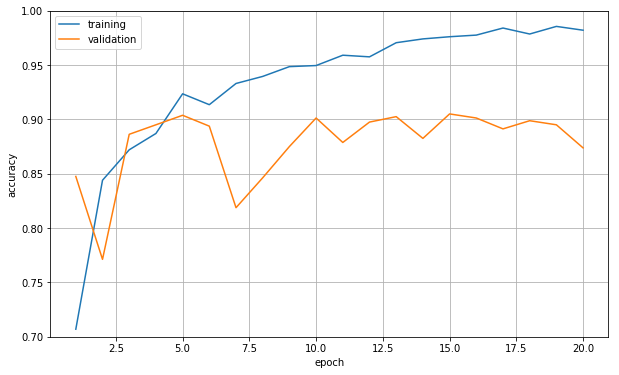

In [16]:
acc = pd.DataFrame({'epoch': range(1,n_epoch+1),
                    'training': history.history['acc'],
                    'validation': history.history['val_acc']})
ax = acc.plot(x='epoch', figsize=(10,6), grid=True)
ax.set_ylabel("accuracy")
ax.set_ylim([0.7,1.0]);

<a id='sec5'></a>
___
## Part 4: Validate accuracy and make predictions on unlabeled data

In [17]:
validation_data = np.load('features_validation.npy')

val_pred_class = model.predict_classes(validation_data,verbose=0) # predict image classes 
#val_pred_prob = model.predict_proba(validation_data,verbose=0) # predict image probabilities

print('Accuracy on validation set: ',np.mean(val_pred_class.ravel()==val_labels)*100,'%')

print('\nVal loss & val_acc')
print(model.evaluate(validation_data,val_labels,verbose=0))
# First number is validation loss, loss of the objective function
# Second number validation accuracy

Accuracy on validation set:  90.5 %

Val loss & val_acc
[0.34069322243332861, 0.90500000000000003]


In [18]:
# Alternative
print('Model accuracy on validation set:',model.evaluate(validation_data,val_labels,verbose=0)[1]*100,'%')

Model accuracy on validation set: 90.5 %


In [19]:
## Print try images:

# Use the model trained in Problem 1 to classify the test data images.
# Create a function that loads one image from the test data and then predicts
# if it is a cat or a dog and with what probability it thinks it is a cat or a dog
#
# Use variable test_data to make predictions
# Use list test_images to obtain the file name for all images (Note: test_images[0] corresponds to test_data[0])
# Use function plot_pic(img) to plot the image file

## Load in processed images feature to feed into bottleneck model

from PIL import Image

test_data = np.load('features_test.npy')

test_images =  [TEST_DIR+'catvdog/'+img for img in sorted(os.listdir(TEST_DIR+'catvdog/'))]

def read_image(file_path):
    # For image visualization
    im = np.array(Image.open(file_path))
    return im

def plot_pic(img):
    pic = read_image(img)    
    plt.figure(figsize=(5,5))
    plt.imshow(pic)
    plt.show()

In [20]:
# view of what feature arrays look like

sample = test_data[:1]
sample.view()

array([[[[-0.        , -0.        , -0.        , ..., -0.        ,
           0.73523653, -0.        ],
         [-0.        , -0.        ,  0.64478183, ..., -0.        ,
           0.38455382, -0.        ],
         [-0.        , -0.        ,  0.47927928, ..., -0.        ,
           0.13853787, -0.        ],
         [-0.        , -0.        , -0.        , ..., -0.        ,
           0.38563791, -0.        ]],

        [[-0.        , -0.        ,  0.43351972, ...,  0.05554855,
           0.69311607, -0.        ],
         [-0.        , -0.        ,  1.29345238, ...,  0.7142275 ,
           0.17479867, -0.        ],
         [-0.        , -0.        ,  0.83037311, ...,  0.08789498,
          -0.        , -0.        ],
         [-0.        , -0.        ,  0.95238149, ...,  0.16329198,
           0.40377554, -0.        ]],

        [[ 0.15070917, -0.        , -0.        , ..., -0.        ,
           0.75900614, -0.        ],
         [-0.        , -0.        , -0.        , ...,  0.523



I think this is a CAT with 99.99838% probability


I think this is a DOG with 100.0% probability


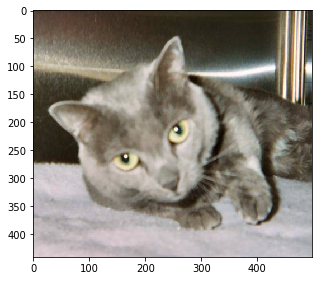



I think this is a DOG with 100.0% probability


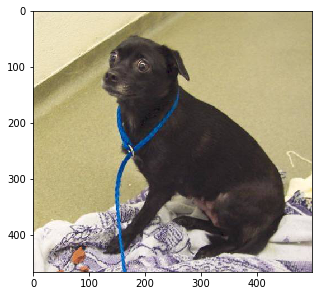



I think this is a CAT with 99.99965% probability


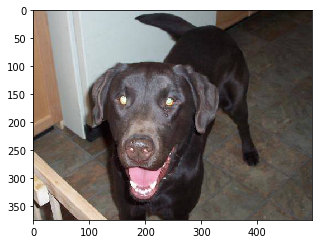



I think this is a DOG with 99.81644% probability


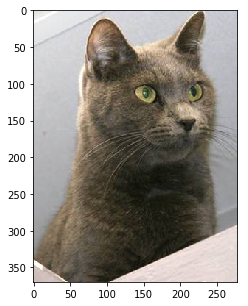



I think this is a CAT with 99.99242% probability


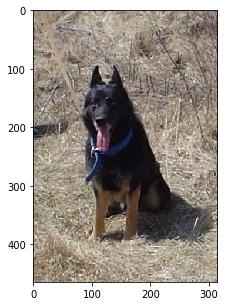



I think this is a CAT with 99.89704% probability


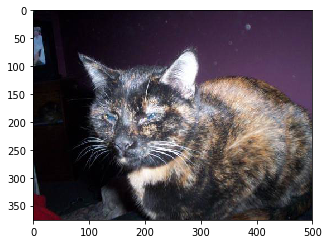



I think this is a CAT with 99.83848% probability


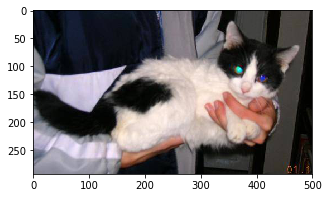



I think this is a CAT with 99.96311% probability


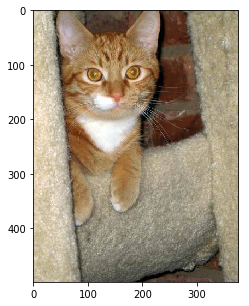



I think this is a DOG with 100.0% probability


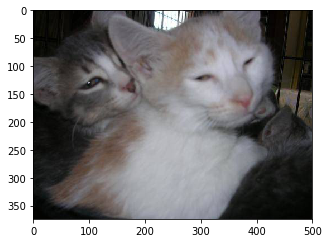

In [21]:
def predict(mod,i=0,r=None):
    if r==None:
        r=[i]
        
    for idx in r:
        class_pred = mod.predict_classes(test_data,verbose=0)[idx]
        prob_pred = mod.predict_proba(test_data,verbose=0)[idx]
        
        if class_pred ==0:
            prob_pred = 1-prob_pred
            class_guess='CAT'
        else:
            class_guess='DOG'
        
        print('\n\nI think this is a ' + class_guess + ' with ' +str(round(float(prob_pred)*100,5)) + '% probability')
        if test_images[idx]=='./data/test/catvdog/.DS_Store' or '.ipynb_checkpoints' in test_images[idx]:
            continue
        plot_pic(test_images[idx])

predict(model,r=range(0,10))       
#predict(model,r=range(90,len(test_images))) # seems to be doing really well

<a id='sec6'></a>
___
___
## Appendix I: Image Classification using Google ML API

### Part 1: Generate Instance

> 1. __Create an Instance:__ https://cloud.google.com/compute/docs/instances/create-start-instance

> 2. __Set Firewall:__ https://cloud.google.com/vpc/docs/firewalls

> 3. __Managing Access and SSH Keys:__ https://cloud.google.com/compute/docs/instances/adding-removing-ssh-keys

> 4. __Enable Vision API:__ https://cloud.google.com/vision/




<br> 

>> ### __BIG REMINDER: When you are done exploring, make sure you stop your instances!__

>> Don’t forget to stop your instance when you are done (by clicking on the stop button at the top of the page showing your instances), otherwise you will run out of credits and then you have to pay. :_(

___

### __Part 1.1: Creating an Instance__

<br>

<table align="center"><img src= "data/Cloud_api_tutorial/api1.png" align="center" height="700" width="900"></table>

<br>

<br>

<table align="center"><img src= "data/Cloud_api_tutorial/api2.png" align="center" height="700" width="900"></table>

<br>

<br>

<table align="center"><img src= "data/Cloud_api_tutorial/api3.png" align="center" height="700" width="900"></table>

<br>

___
### __Part 1.2: Set Firewall__

<br>

<table align="center"><img src= "data/Cloud_api_tutorial/api4.png" align="center" height="700" width="900"></table>

<br>

<br>

<table align="center"><img src= "data/Cloud_api_tutorial/api5.png" align="center" height="700" width="900"></table>

<br>

___
### __Part 1.3: Credentialing (Managing Access and SSH Keys)__

<br>

<table align="center"><img src= "data/Cloud_api_tutorial/api6.png" align="center" height="700" width="900"></table>

<br>

___
### __Part 1.4: Enable Vision API__

<br>

<table align="center"><img src= "data/Cloud_api_tutorial/api7.png" align="center" height="700" width="900"></table>

<br>

<br>

___
### Part 2: Connect to Environment

> 1. __Save API Key__ 

> 2. __Download Google Cloud API__ 

> 3. __Establish Connectivity__ 

> 4. __Create Python Scrypt__ 




<br> 



>> ### __BIG REMINDER: When you are done exploring, make sure you stop your instances!__

>> Don’t forget to stop your instance when you are done (by clicking on the stop button at the top of the page showing your instances), otherwise you will run out of credits and then you have to pay. :_(


___
### __Part 2.1: Save API Key__

__General Instructions__

> 1. Go to Downloads folder.
> 2. Find file that was autodownloaded after credentialing (see Part 1.3 above).
> 3. Open file (Note: file is of "json" data type) with your favorite text editor, and copy (ctrl+c or command+c) all the contents.
> 4. Create a new directory (folder) in the location you plan to store you SSH Keys, and give it an appropriate name (e.g. cio-api-keys).
> 5. Create a new file within this new directory, and paste clipboard contents to it. 
> 6. Save file -- something along the lines of myapikeys.json, should work. 
>> __Note:__ Make sure that you have saved the file in the correct data type -- i.e. ".json"

<br>

__Instuctions to follow Elias's approach__

<br>

<table align="center"><img src= "data/Cloud_api_tutorial/api8.png" align="center" height="700" width="900"></table>

<br>

<br>


___
### __Part 2.2: Download Google Cloud API__

<br>

<table align="center"><img src= "data/Cloud_api_tutorial/api9.png" align="center" height="700" width="900"></table>

<br>

___
### __Part 2.3: Establish Connectivity__

<br>

<table align="center"><img src= "data/Cloud_api_tutorial/api10.png" align="center" height="700" width="900"></table>

<br>

___
### __Part 2.4: Create Python Script__

<br>

<table align="center"><img src= "data/Cloud_api_tutorial/api11.png" align="center" height="700" width="900"></table>

<br>

___
___

> # That's it!  You are are ready to start playing with the Vision API!

<a id='sec7'></a>
___
___
## Appendix II: Resources and references to material we won't cover in detail

> * **3Blue1Brown (Videos Explaining NN's):** https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi 

> * **Cloud Vision API:** https://cloud.google.com/vision/docs/reference/rest/

> * **Google Cloud API:** https://cloud.google.com/apis/ 

> * **Jupyter Notebook (tutorial):** https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook

> * **Keras:** https://keras.io/

> * **TensorFlow:** https://www.tensorflow.org/


<br>

___
___

![data-x](https://raw.githubusercontent.com/afo/data-x-plaksha/master/imgsource/dx_logo.png)